# Tiền xử lí và khám phá dữ liệu

## Tóm tắt

- Xử lí dữ liệu bị thiếu, bị nhiễu

- Chuẩn hóa dữ liệu

- Trực quan hóa dữ liệu

- Đặt câu hỏi và trả lời câu hỏi

### 1. Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### 2. Tiền xử lí dữ liệu

In [2]:
df = pd.read_csv('data/mxmh_survey_results.csv')
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


- Chúng ta sẽ loại bỏ các cột không có nhiều tác dụng trong bài làm của nhóm. Các cột đó là 'Timestamp', 'Permissions' 

In [3]:
df.drop(['Timestamp', 'Permissions'], axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           735 non-null    float64
 1   Primary streaming service     735 non-null    object 
 2   Hours per day                 736 non-null    float64
 3   While working                 733 non-null    object 
 4   Instrumentalist               732 non-null    object 
 5   Composer                      735 non-null    object 
 6   Fav genre                     736 non-null    object 
 7   Exploratory                   736 non-null    object 
 8   Foreign languages             732 non-null    object 
 9   BPM                           629 non-null    float64
 10  Frequency [Classical]         736 non-null    object 
 11  Frequency [Country]           736 non-null    object 
 12  Frequency [EDM]               736 non-null    object 
 13  Frequ

- Kiểu dữ liệu của các cột đã đúng với kiểu dữ liệu mong muốn của nhóm nên sẽ không cần xử lí thêm về phần này

In [5]:
df.shape

(736, 31)

- Kiểm tra dữ liệu có bị thiếu không

In [6]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

Age                            1
Primary streaming service      1
While working                  3
Instrumentalist                4
Composer                       1
Foreign languages              4
BPM                          107
Music effects                  8
dtype: int64

- Vì những giá trị thiếu là khá ít ngoại trừ cột BPM nên nhóm quyết định sẽ xóa những dòng bị thiếu dữ liệu ngoại trừ những dòng thiếu dữ liệu cột 'BPM'. 

In [7]:
cols_with_few_missing_values = missing_values[missing_values < 10].index
df = df.dropna(subset=cols_with_few_missing_values)
df.shape

(718, 31)

- Vì các giá trị BPM bị thiếu khá nhiều nên nhóm sẽ thay thế những giá trị thiếu này bằng giá trị median của cột.

In [8]:
df['BPM'].fillna(df['BPM'].median(), inplace=True)
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,718.000000,718.000000,7.180000e+02,718.000000,718.000000,718.000000,718.000000
mean,25.176880,3.578064,1.392881e+06,5.837744,4.806407,3.717967,2.635097
std,11.953918,3.017779,3.731966e+07,2.784533,3.020061,3.084387,2.844382
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.050000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.400000e+02,8.000000,7.000000,6.000000,4.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


- Dựa vào kết quả trên nhóm nhận thấy cột 'BPM' và 'Hours per day' có những giá trị gây nhiễu cần phải xử lí nên nhóm sẽ xử lí nhiễu trước.

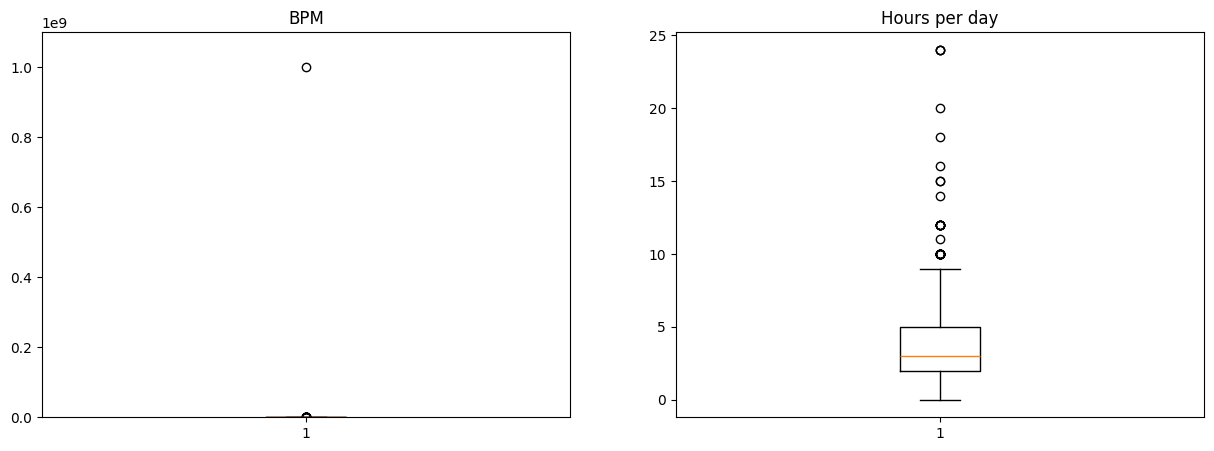

In [9]:
#Vẽ 2 biểu đồ boxplot cho 2 cột BPM và Hours per day
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].boxplot(df['BPM'].dropna())
ax[0].set_title('BPM')
ax[0].set_ylim(0, 1100000000)
ax[1].set_title('Hours per day')
ax[1].boxplot(df['Hours per day'])
plt.show()

In [10]:
#Xử lí nhiễu
q1_bpm = df['BPM'].quantile(0.25)
q3_bpm = df['BPM'].quantile(0.75)
iqr_bpm = q3_bpm - q1_bpm
df = df[(df['BPM'] >= q1_bpm - 1.5 * iqr_bpm) & (df['BPM'] <= q3_bpm + 1.5 * iqr_bpm)]
q1_hours = df['Hours per day'].quantile(0.25)
q3_hours = df['Hours per day'].quantile(0.75)
iqr_hours = q3_hours - q1_hours
df = df[(df['Hours per day'] >= q1_hours - 1.5 * iqr_hours) & (df['Hours per day'] <= q3_hours + 1.5 * iqr_hours)]
df.shape

(655, 31)

In [11]:
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000
mean,25.077863,3.068779,121.160305,5.814504,4.734351,3.661832,2.610687
std,11.569827,1.981774,26.784397,2.778443,2.969590,3.049627,2.826866
min,10.000000,0.000000,55.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,105.000000,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,120.000000,6.000000,5.000000,3.000000,2.000000
75%,28.000000,4.000000,137.000000,8.000000,7.000000,6.000000,4.000000
max,80.000000,9.000000,192.000000,10.000000,10.000000,10.000000,10.000000


- Tiếp theo, nhóm sẽ tiến hành xem xét các cột chứa dữ liệu không phải số

In [12]:
df.describe(exclude=np.number).T

,count,unique,top,freq
Primary streaming service,655,6,Spotify,406
While working,655,2,Yes,513
Instrumentalist,655,2,No,444
Composer,655,2,No,548
Fav genre,655,16,Rock,166
Exploratory,655,2,Yes,463
Foreign languages,655,2,Yes,355
Frequency [Classical],655,4,Rarely,232
Frequency [Country],655,4,Never,300
Frequency [EDM],655,4,Never,275


- Nhóm nhận thấy dữ liệu trong các cột Frequency* là kiểu dữ liệu phân loại thứ tự có các mức ['Never', 'Sometimes', 'Rarely', 'Very frequently'] nên nhóm sẽ chuyển các giá trị này về giá trị số tương ứng từ 0 đến 3

In [13]:
# Chuyển dữ liệu trong các cột Frequency* thành dạng số tương ứng
for col in df.columns:
    if col.startswith('Frequency'):
        df[col] = df[col].map({'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3})
df.head()


,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,1,0,1,1,3,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,2,2,0,0,0,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,2,3,3,0,1,7.0,2.0,5.0,9.0,Improve
5,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,...,3,3,3,3,0,8.0,8.0,7.0,7.0,Improve
6,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,...,1,1,0,0,2,4.0,8.0,6.0,0.0,Improve


- Kiểm tra người khảo sát có nghe thể loại nhạc yêu thích của họ nhiều nhất không

In [14]:
df_copy = df.copy()

def check_max(row):
    fav_genre_col = 'Frequency [' + row['Fav genre']+']'
    other_frequency_cols = [col for col in df.columns if 'Frequency' in col and col != fav_genre_col]
    return row[fav_genre_col] >= row[other_frequency_cols].max()

df_copy['Is Max'] = df_copy.apply(check_max, axis=1)

if(df_copy['Is Max'].all()==False):
    print('Có mâu thuẫn trong Fav genre và Frequency')
    df_copy = df_copy[df_copy['Is Max']]
else:  
    print('Không có mâu thuẫn trong Fav genre và Frequency')

assert df_copy['Is Max'].all() == True
df=df_copy.drop(columns=['Is Max'])
df

Có mâu thuẫn trong Fav genre và Frequency


,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,1,0,1,1,3,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,2,2,0,0,0,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,2,3,3,0,1,7.0,2.0,5.0,9.0,Improve
5,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,...,3,3,3,3,0,8.0,8.0,7.0,7.0,Improve
6,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,...,1,1,0,0,2,4.0,8.0,6.0,0.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,21.0,Spotify,2.0,Yes,No,No,R&B,Yes,Yes,147.0,...,2,3,2,2,2,7.0,6.0,4.0,6.0,Improve
731,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,120.0,...,3,0,1,3,0,7.0,6.0,0.0,9.0,Improve
732,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,160.0,...,3,0,0,2,2,3.0,2.0,2.0,5.0,Improve
734,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,170.0,...,0,0,0,0,2,2.0,3.0,2.0,1.0,Improve


In [15]:
# Lưu dữ liệu vào file csv
df.to_csv('data/mxmh_survey_results_clean.csv', index=False)